In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.metrics import accuracy_score
import shutil
import matplotlib.pyplot as plt

path = r'/content/drive/MyDrive/hackerthon/chicken/'

In [ ]:
trainFileList = os.listdir(path+'train')
testFileList = os.listdir(path+'test')

In [ ]:
trainFileList = [x for x in trainFileList if 'jpg' in x]
testFileList = [x for x in testFileList if 'jpg' in x]

In [ ]:
# Image Resize

for imgs in trainFileList:
  img = cv2.imread(path+'train/'+imgs)
  img_resize = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
  cv2.imwrite(path+'train/'+imgs, img_resize)

for imgs in testFileList:
  img = cv2.imread(path+'test/'+imgs)
  img_resize = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
  cv2.imwrite(path+'test/'+imgs, img_resize)

In [ ]:
label_list = list(set(map(lambda x : x[-6:-4], trainFileList)))

In [ ]:
# 폴더 만들어주기 train
currentPath = path + 'train'

try:
    for key in label_list: # dark jab ...
        os.makedirs(currentPath + f'/{key}')
except:
    pass

for file in trainFileList:
    label = file.split('_')[1].split('.')[0]
    targetPath = currentPath + f'/{label}'
    try :
        shutil.move(currentPath+f'/{file}', targetPath+f'/{file}')
    except:
        pass

In [ ]:
# 폴더 만들어주기 test
currentPath = path + 'test'

try:
    for key in label_list: # dark jab ...
        os.makedirs(currentPath + f'/{key}')
except:
    pass

for file in testFileList:
    label = file.split('_')[1].split('.')[0]
    targetPath = currentPath + f'/{label}'
    try :
        shutil.move(currentPath+f'/{file}', targetPath+f'/{file}')
    except:
        pass

In [ ]:
trainDataGen = ImageDataGenerator(rescale=1./255,
                                 rotation_range = 10,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest'
                                 )

In [ ]:
trainGenSet = trainDataGen.flow_from_directory(
    path + 'train',
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 50 images belonging to 10 classes.


In [ ]:
testDataGen = ImageDataGenerator(rescale=1./255)

In [ ]:
testGenSet = testDataGen.flow_from_directory(
    path + 'test',
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 15 images belonging to 10 classes.


In [ ]:
valDataGen = ImageDataGenerator(rescale=1./255,
                                 rotation_range = 15,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.1,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest')

valGenSet = valDataGen.flow_from_directory(
    path + 'train',
    target_size=(28,28),
    batch_size=64,
    class_mode='categorical'
)

Found 50 images belonging to 10 classes.


In [ ]:
# 모델 구성

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)        

In [ ]:
#모델 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# fit
model.fit(
    trainGenSet,
    steps_per_epoch=3,
    epochs=100,
    validation_data=valGenSet,
    validation_steps=10,
)

Epoch 1/100
3/3 [==============================] - 3s 964ms/step - loss: 2.3086 - accuracy: 0.1333 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/100
3/3 [==============================] - 3s 850ms/step - loss: 2.3454 - accuracy: 0.0733 - val_loss: 2.3021 - val_accuracy: 0.1080
Epoch 3/100
3/3 [==============================] - 3s 835ms/step - loss: 2.3213 - accuracy: 0.0933 - val_loss: 2.2989 - val_accuracy: 0.0980
Epoch 4/100
3/3 [==============================] - 3s 857ms/step - loss: 2.3129 - accuracy: 0.0667 - val_loss: 2.2981 - val_accuracy: 0.1020
Epoch 5/100
3/3 [==============================] - 2s 825ms/step - loss: 2.2956 - accuracy: 0.1133 - val_loss: 2.2964 - val_accuracy: 0.1020
Epoch 6/100
3/3 [==============================] - 3s 839ms/step - loss: 2.2966 - accuracy: 0.1067 - val_loss: 2.2871 - val_accuracy: 0.2060
Epoch 7/100
3/3 [==============================] - 2s 826ms/step - loss: 2.2764 - accuracy: 0.1600 - val_loss: 2.2635 - val_accuracy: 0.2020
Epoch 8/100
3

In [ ]:
train_score = model.evaluate(trainGenSet)
test_score = model.evaluate(testGenSet)
print(train_score)
print(test_score)

1/1 [==============================] - 0s 47ms/step
[0.09512083232402802, 0.9800000190734863]
[5.650177955627441, 0.20000000298023224]




클로바 나눔손글씨 아줌마 자유


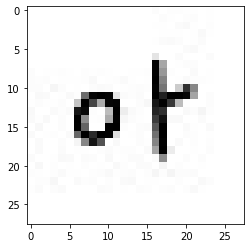



클로바 나눔손글씨 고딕 아니고 고딩


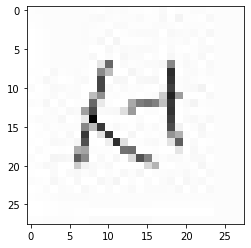



클로바 나눔손글씨 고딕 아니고 고딩


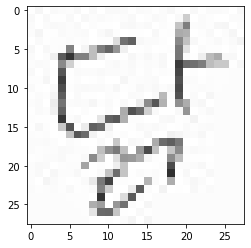



클로바 나눔손글씨 강인한 위로


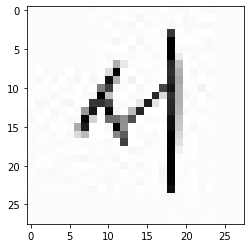



클로바 나눔손글씨 고딕 아니고 고딩


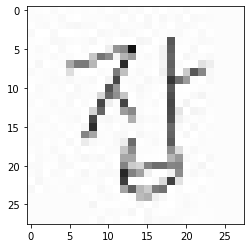



클로바 나눔손글씨 고딕 아니고 고딩


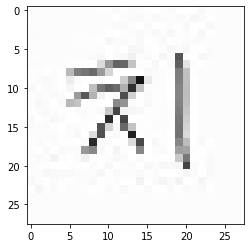



클로바 나눔손글씨 아줌마 자유


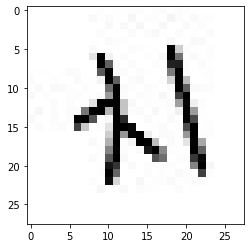



클로바 나눔손글씨 고딕 아니고 고딩


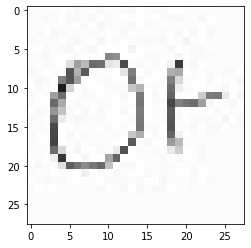



클로바 나눔손글씨 아줌마 자유


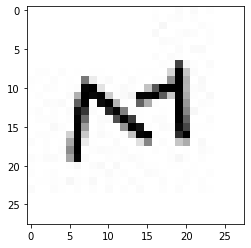



클로바 나눔손글씨 강인한 위로


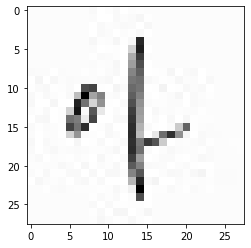



클로바 나눔손글씨 아줌마 자유


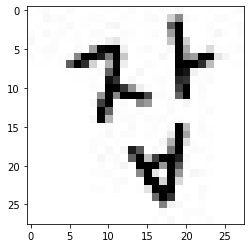



클로바 나눔손글씨 아줌마 자유


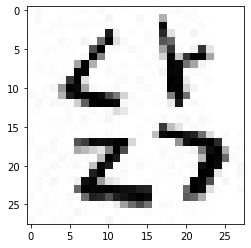



클로바 나눔손글씨 강인한 위로


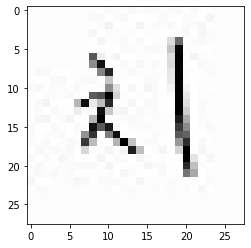



클로바 나눔손글씨 강인한 위로


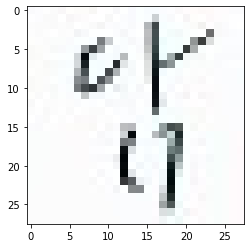



클로바 나눔손글씨 강인한 위로


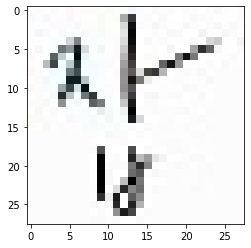

In [ ]:
import matplotlib.pyplot as plt

font = {
    '[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]':'클로바 나눔손글씨 아줌마 자유',
    '[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]':'클로바 나눔손글씨 고딕 아니고 고딩',
    '[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]':'클로바 나눔손글씨 강인한 위로'
}

x_test, y_test = testGenSet.next()
for idx in range(len(x_test)) :
    print('\n')
    print(font[f'{y_test[idx]}'])
    plt.imshow(x_test[idx])
    plt.show()